### IST718 Lab 9
### Andrew Zelazny
### 2019-08-31

The following code was used to complete Lab 9 for IST718, which was to use two or more machine learning classifiers on the MNIST fashion dataset and compare and contrast their relative performance.

In [1]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
import seaborn as sns
import time

# Import from sklearn 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Import data from mnist repository
# Cloned via: git clone git@github.com:zalandoresearch/fashion-mnist.git
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

# Normalize the input data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


### Naive Bayes

In [100]:
# Train a Naive Bayes classifier, sweeping different smooting inputs

gauss_nb_dict = {}
vals = np.arange(1, -10, -1)
for exp in vals:
    start = time.time()
    clf = GaussianNB(priors=None, var_smoothing=10**float(exp))
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    train_time = time.time()-start
    gauss_nb_dict.update({exp: {'score': score, 'time': train_time}})
    
    print(f"Time to train: {train_time:0.2}s")
    print(f"Exponent: {exp:0.1f}, Accuracy: {score*100:0.2f}%")
    
    



Time to train: 2.4s
Exponent: 1.0, Accuracy: 56.40%
Time to train: 2.3s
Exponent: 0.0, Accuracy: 62.24%
Time to train: 2.3s
Exponent: -1.0, Accuracy: 65.35%
Time to train: 2.4s
Exponent: -2.0, Accuracy: 64.73%
Time to train: 2.4s
Exponent: -3.0, Accuracy: 62.96%
Time to train: 2.4s
Exponent: -4.0, Accuracy: 61.77%
Time to train: 2.4s
Exponent: -5.0, Accuracy: 61.11%
Time to train: 2.4s
Exponent: -6.0, Accuracy: 61.20%
Time to train: 2.3s
Exponent: -7.0, Accuracy: 54.15%
Time to train: 2.3s
Exponent: -8.0, Accuracy: 29.80%
Time to train: 2.3s
Exponent: -9.0, Accuracy: 29.16%


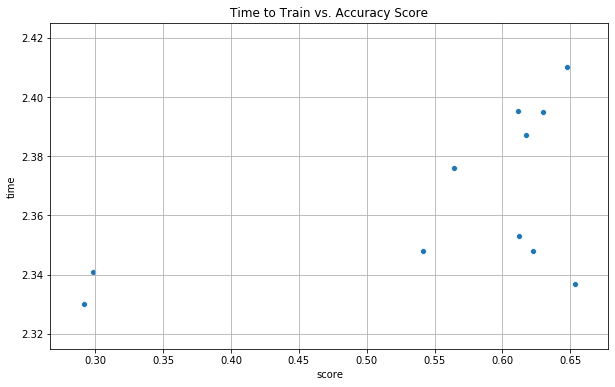

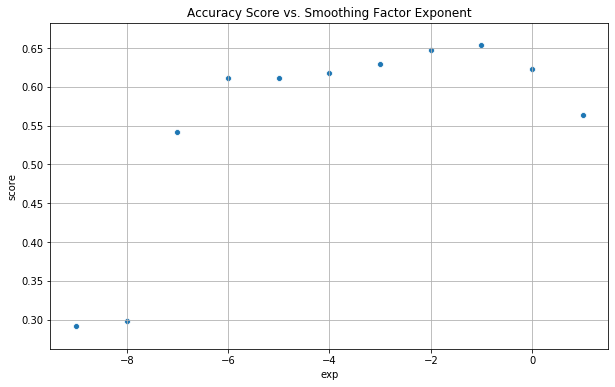

In [102]:
# Load results for Naive Bayes and plot

nb_df = pd.DataFrame(gauss_nb_dict).transpose()
nb_df.loc[:, 'exp'] = nb_df.index

# Plot metrics for Naive-Bayes classifiers
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot('score', 'time', data=nb_df)
ax.grid('True')
plt.title('Time to Train vs. Accuracy Score')
plt.savefig('NB_time_vs_score.png')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot('exp', 'score', data=nb_df)
ax.grid('True')
plt.title('Accuracy Score vs. Smoothing Factor Exponent')
plt.savefig('NB_score_vs_exp.png')
plt.show()

### Multilayer Perceptron

In [74]:
# Create a function to set default inputs to a MLPClassifier and return training and test scores
# Can be called repeatedly with varying inputs to attempt to find more optimal hyper paramters for the model

def test_MLP_classifier(hidden_layer_sizes=(50,), max_iter=30, alpha=1e-4,
                        solver='sgd', verbose=True, tol=5e-4, random_state=1,
                        learning_rate_init=.1, **kwargs):
    
    # Create the MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, alpha=alpha,
                        solver=solver, verbose=verbose, tol=tol, random_state=random_state,
                        learning_rate_init=learning_rate_init, **kwargs)

    # Fit the model to the training data
    mlp.fit(X_train, y_train)
    
    # Get the training and testing scores
    train_score = mlp.score(X_train, y_train)
    test_score = mlp.score(X_test, y_test)
    
    # Print for output while running
    print("Training set score: {:0.4f}".format(train_score) )
    print("Test set score: {:0.4f}".format(test_score))
    
    # Return results
    return (mlp, train_score, test_score)



In [82]:
# Create an array of max iterations
iters = np.arange(10, 60, 10)
print(iters)

# create a dictionary to store results
iter_dict = {}

# Loop through different values of max iterations
for max_iter in iters:
    print("Max iter = {:d}".format(max_iter))
    test_results = test_MLP_classifier(max_iter=max_iter, verbose=True)
    iter_dict.update({max_iter: {'train': test_results[1], 'test': test_results[2]}})
    
    


[10 20 30 40 50]
Max iter = 10
Iteration 1, loss = 0.48080567
Iteration 2, loss = 0.35983583
Iteration 3, loss = 0.33601599
Iteration 4, loss = 0.31293779
Iteration 5, loss = 0.29591189
Iteration 6, loss = 0.28717980
Iteration 7, loss = 0.27583530
Iteration 8, loss = 0.26000223
Iteration 9, loss = 0.25506881
Iteration 10, loss = 0.25501442


Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9141
Test set score: 0.8687
Max iter = 20
Iteration 1, loss = 0.48080567
Iteration 2, loss = 0.35983583
Iteration 3, loss = 0.33601599
Iteration 4, loss = 0.31293779
Iteration 5, loss = 0.29591189
Iteration 6, loss = 0.28717980
Iteration 7, loss = 0.27583530
Iteration 8, loss = 0.26000223
Iteration 9, loss = 0.25506881
Iteration 10, loss = 0.25501442
Iteration 11, loss = 0.24173318
Iteration 12, loss = 0.23542810
Iteration 13, loss = 0.22595403
Iteration 14, loss = 0.22717555
Iteration 15, loss = 0.21629361
Iteration 16, loss = 0.21600931
Iteration 17, loss = 0.21023253
Iteration 18, loss = 0.20699249
Iteration 19, loss = 0.19821499
Iteration 20, loss = 0.20342344


Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9318
Test set score: 0.8649
Max iter = 30
Iteration 1, loss = 0.48080567
Iteration 2, loss = 0.35983583
Iteration 3, loss = 0.33601599
Iteration 4, loss = 0.31293779
Iteration 5, loss = 0.29591189
Iteration 6, loss = 0.28717980
Iteration 7, loss = 0.27583530
Iteration 8, loss = 0.26000223
Iteration 9, loss = 0.25506881
Iteration 10, loss = 0.25501442
Iteration 11, loss = 0.24173318
Iteration 12, loss = 0.23542810
Iteration 13, loss = 0.22595403
Iteration 14, loss = 0.22717555
Iteration 15, loss = 0.21629361
Iteration 16, loss = 0.21600931
Iteration 17, loss = 0.21023253
Iteration 18, loss = 0.20699249
Iteration 19, loss = 0.19821499
Iteration 20, loss = 0.20342344
Iteration 21, loss = 0.19786095
Iteration 22, loss = 0.19049659
Iteration 23, loss = 0.19367044
Iteration 24, loss = 0.18920694
Iteration 25, loss = 0.18788170
Iteration 26, loss = 0.18941330
Iteration 27, loss = 0.18380575
Iteration 28, loss = 0.17068690
Iteration 29, loss = 0.16263737
Iteration 30, los

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9496
Test set score: 0.8683
Max iter = 40
Iteration 1, loss = 0.48080567
Iteration 2, loss = 0.35983583
Iteration 3, loss = 0.33601599
Iteration 4, loss = 0.31293779
Iteration 5, loss = 0.29591189
Iteration 6, loss = 0.28717980
Iteration 7, loss = 0.27583530
Iteration 8, loss = 0.26000223
Iteration 9, loss = 0.25506881
Iteration 10, loss = 0.25501442
Iteration 11, loss = 0.24173318
Iteration 12, loss = 0.23542810
Iteration 13, loss = 0.22595403
Iteration 14, loss = 0.22717555
Iteration 15, loss = 0.21629361
Iteration 16, loss = 0.21600931
Iteration 17, loss = 0.21023253
Iteration 18, loss = 0.20699249
Iteration 19, loss = 0.19821499
Iteration 20, loss = 0.20342344
Iteration 21, loss = 0.19786095
Iteration 22, loss = 0.19049659
Iteration 23, loss = 0.19367044
Iteration 24, loss = 0.18920694
Iteration 25, loss = 0.18788170
Iteration 26, loss = 0.18941330
Iteration 27, loss = 0.18380575
Iteration 28, loss = 0.17068690
Iteration 29, loss = 0.16263737
Iteration 30, los

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9500
Test set score: 0.8651
Max iter = 50
Iteration 1, loss = 0.48080567
Iteration 2, loss = 0.35983583
Iteration 3, loss = 0.33601599
Iteration 4, loss = 0.31293779
Iteration 5, loss = 0.29591189
Iteration 6, loss = 0.28717980
Iteration 7, loss = 0.27583530
Iteration 8, loss = 0.26000223
Iteration 9, loss = 0.25506881
Iteration 10, loss = 0.25501442
Iteration 11, loss = 0.24173318
Iteration 12, loss = 0.23542810
Iteration 13, loss = 0.22595403
Iteration 14, loss = 0.22717555
Iteration 15, loss = 0.21629361
Iteration 16, loss = 0.21600931
Iteration 17, loss = 0.21023253
Iteration 18, loss = 0.20699249
Iteration 19, loss = 0.19821499
Iteration 20, loss = 0.20342344
Iteration 21, loss = 0.19786095
Iteration 22, loss = 0.19049659
Iteration 23, loss = 0.19367044
Iteration 24, loss = 0.18920694
Iteration 25, loss = 0.18788170
Iteration 26, loss = 0.18941330
Iteration 27, loss = 0.18380575
Iteration 28, loss = 0.17068690
Iteration 29, loss = 0.16263737
Iteration 30, los

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9517
Test set score: 0.8674


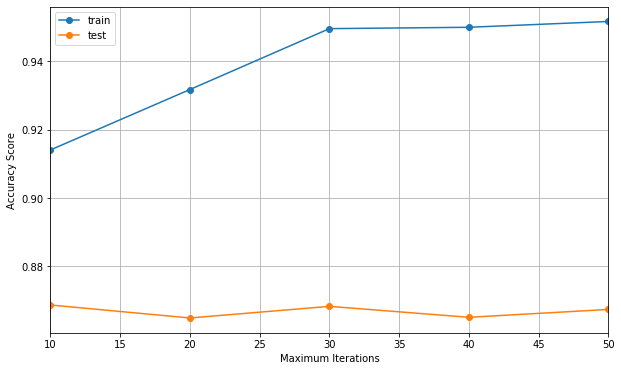

In [108]:
# Plot results from sweeping max iterations
iter_df = pd.DataFrame(iter_dict)
fig, ax = plt.subplots(figsize=(10,6))
iter_df.transpose().loc[:, ['train', 'test']].plot(marker='o', ax=ax)
plt.grid(True)
plt.ylabel('Accuracy Score')
plt.xlabel('Maximum Iterations')
plt.savefig('MLP_max_iters.png')
plt.show()

In [99]:
shape_dict = {}

shape_array = np.arange(25, 150, 25)
for shape in shape_array:
    print("Shape = {:d}".format(shape))
    test_results = test_MLP_classifier(hidden_layer_sizes=(shape,10), max_iter=50, learning_rate_init=0.005)
    shape_dict.update({shape: {'train': test_results[1], 'test': test_results[2]}})

Shape = 25
Iteration 1, loss = 0.86493705
Iteration 2, loss = 0.47402884
Iteration 3, loss = 0.42128225
Iteration 4, loss = 0.39286712
Iteration 5, loss = 0.37425298
Iteration 6, loss = 0.35926682
Iteration 7, loss = 0.34835069
Iteration 8, loss = 0.33842908
Iteration 9, loss = 0.33070632
Iteration 10, loss = 0.32378697
Iteration 11, loss = 0.31774242
Iteration 12, loss = 0.31121073
Iteration 13, loss = 0.30692130
Iteration 14, loss = 0.30216335
Iteration 15, loss = 0.29767064
Iteration 16, loss = 0.29356587
Iteration 17, loss = 0.28929628
Iteration 18, loss = 0.28556109
Iteration 19, loss = 0.28151582
Iteration 20, loss = 0.27848437
Iteration 21, loss = 0.27460297
Iteration 22, loss = 0.27235755
Iteration 23, loss = 0.26859374
Iteration 24, loss = 0.26570529
Iteration 25, loss = 0.26369526
Iteration 26, loss = 0.26030717
Iteration 27, loss = 0.25810395
Iteration 28, loss = 0.25533642
Iteration 29, loss = 0.25262886
Iteration 30, loss = 0.24981244
Iteration 31, loss = 0.24791594
Iterat

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9286
Test set score: 0.8693
Shape = 50
Iteration 1, loss = 0.70526215
Iteration 2, loss = 0.43250385
Iteration 3, loss = 0.39135705
Iteration 4, loss = 0.36775629
Iteration 5, loss = 0.35062564
Iteration 6, loss = 0.33659581
Iteration 7, loss = 0.32607246
Iteration 8, loss = 0.31580062
Iteration 9, loss = 0.30680871
Iteration 10, loss = 0.29916736
Iteration 11, loss = 0.29218495
Iteration 12, loss = 0.28491709
Iteration 13, loss = 0.27904959
Iteration 14, loss = 0.27280117
Iteration 15, loss = 0.26740540
Iteration 16, loss = 0.26077793
Iteration 17, loss = 0.25536510
Iteration 18, loss = 0.25100021
Iteration 19, loss = 0.24663777
Iteration 20, loss = 0.24161164
Iteration 21, loss = 0.23687917
Iteration 22, loss = 0.23261134
Iteration 23, loss = 0.22776592
Iteration 24, loss = 0.22342777
Iteration 25, loss = 0.22036616
Iteration 26, loss = 0.21575608
Iteration 27, loss = 0.21272287
Iteration 28, loss = 0.20945376
Iteration 29, loss = 0.20575399
Iteration 30, loss =

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9531
Test set score: 0.8713
Shape = 75
Iteration 1, loss = 0.76796204
Iteration 2, loss = 0.43115161
Iteration 3, loss = 0.37970330
Iteration 4, loss = 0.35253703
Iteration 5, loss = 0.33358909
Iteration 6, loss = 0.31782088
Iteration 7, loss = 0.30510449
Iteration 8, loss = 0.29386791
Iteration 9, loss = 0.28447439
Iteration 10, loss = 0.27564311
Iteration 11, loss = 0.26654036
Iteration 12, loss = 0.26001044
Iteration 13, loss = 0.25303108
Iteration 14, loss = 0.24575578
Iteration 15, loss = 0.23996796
Iteration 16, loss = 0.23311785
Iteration 17, loss = 0.22802171
Iteration 18, loss = 0.22276399
Iteration 19, loss = 0.21706715
Iteration 20, loss = 0.21148622
Iteration 21, loss = 0.20656577
Iteration 22, loss = 0.20220857
Iteration 23, loss = 0.19662048
Iteration 24, loss = 0.19218953
Iteration 25, loss = 0.18752135
Iteration 26, loss = 0.18424130
Iteration 27, loss = 0.17917454
Iteration 28, loss = 0.17528711
Iteration 29, loss = 0.17075268
Iteration 30, loss =

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9673
Test set score: 0.8755
Shape = 100
Iteration 1, loss = 0.78987765
Iteration 2, loss = 0.42717295
Iteration 3, loss = 0.38159230
Iteration 4, loss = 0.35546364
Iteration 5, loss = 0.33588344
Iteration 6, loss = 0.32039826
Iteration 7, loss = 0.30800437
Iteration 8, loss = 0.29510164
Iteration 9, loss = 0.28634633
Iteration 10, loss = 0.27545755
Iteration 11, loss = 0.26597217
Iteration 12, loss = 0.25852291
Iteration 13, loss = 0.25045413
Iteration 14, loss = 0.24300066
Iteration 15, loss = 0.23689234
Iteration 16, loss = 0.22979242
Iteration 17, loss = 0.22307629
Iteration 18, loss = 0.21631219
Iteration 19, loss = 0.21048734
Iteration 20, loss = 0.20503359
Iteration 21, loss = 0.19825962
Iteration 22, loss = 0.19250584
Iteration 23, loss = 0.18839682
Iteration 24, loss = 0.18292750
Iteration 25, loss = 0.17796516
Iteration 26, loss = 0.17281924
Iteration 27, loss = 0.16779396
Iteration 28, loss = 0.16227988
Iteration 29, loss = 0.15760315
Iteration 30, loss 

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9782
Test set score: 0.8792
Shape = 125
Iteration 1, loss = 0.78187455
Iteration 2, loss = 0.43741309
Iteration 3, loss = 0.38312471
Iteration 4, loss = 0.35281869
Iteration 5, loss = 0.33224086
Iteration 6, loss = 0.31618661
Iteration 7, loss = 0.30254517
Iteration 8, loss = 0.28996529
Iteration 9, loss = 0.27955584
Iteration 10, loss = 0.26970613
Iteration 11, loss = 0.26038353
Iteration 12, loss = 0.25174481
Iteration 13, loss = 0.24383734
Iteration 14, loss = 0.23591599
Iteration 15, loss = 0.22695144
Iteration 16, loss = 0.22138130
Iteration 17, loss = 0.21428805
Iteration 18, loss = 0.20813727
Iteration 19, loss = 0.20150225
Iteration 20, loss = 0.19638108
Iteration 21, loss = 0.18993023
Iteration 22, loss = 0.18407705
Iteration 23, loss = 0.17764091
Iteration 24, loss = 0.17288279
Iteration 25, loss = 0.16853704
Iteration 26, loss = 0.16241145
Iteration 27, loss = 0.15912650
Iteration 28, loss = 0.15252428
Iteration 29, loss = 0.14827926
Iteration 30, loss 

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9738
Test set score: 0.8773


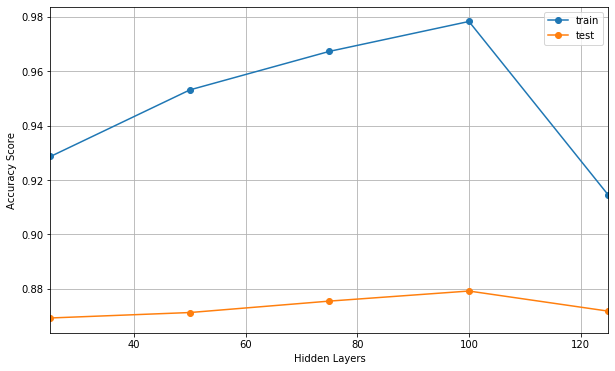

In [109]:
# Plot results from varying shape
shape_df = pd.DataFrame(shape_dict)
fig, ax = plt.subplots(figsize=(10,6))
shape_df.transpose().loc[:, ['train', 'test']].plot(marker='o', ax=ax)
plt.grid(True)
plt.ylabel('Accuracy Score')
plt.xlabel('Hidden Layers')
plt.savefig('MLP_shapes.png')
plt.show()

In [118]:
learn_dict = {}

learn_array = [0.05, 0.01, 0.001, 0.001]
for learn in learn_array:
    print("learn = {}".format(learn))
    start=time.time()
    test_results = test_MLP_classifier(hidden_layer_sizes=(100,10), max_iter=50, learning_rate_init=learn)
    train_time = time.time() - start
    learn_dict.update({learn: {'train': test_results[1], 'test': test_results[2], 'time': train_time}})

learn = 0.05
Iteration 1, loss = 0.50843041
Iteration 2, loss = 0.34800887
Iteration 3, loss = 0.31218529
Iteration 4, loss = 0.28708455
Iteration 5, loss = 0.26948125
Iteration 6, loss = 0.25458216
Iteration 7, loss = 0.24122652
Iteration 8, loss = 0.22919426
Iteration 9, loss = 0.21779177
Iteration 10, loss = 0.21195151
Iteration 11, loss = 0.19882335
Iteration 12, loss = 0.19506721
Iteration 13, loss = 0.18362264
Iteration 14, loss = 0.18443901
Iteration 15, loss = 0.17530735
Iteration 16, loss = 0.16791386
Iteration 17, loss = 0.16713412
Iteration 18, loss = 0.15909018
Iteration 19, loss = 0.15439225
Iteration 20, loss = 0.15079753
Iteration 21, loss = 0.14935462
Iteration 22, loss = 0.13985655
Iteration 23, loss = 0.13688236
Iteration 24, loss = 0.13001316
Iteration 25, loss = 0.12717722
Iteration 26, loss = 0.12368798
Iteration 27, loss = 0.12224057
Iteration 28, loss = 0.11916141
Iteration 29, loss = 0.11698395
Iteration 30, loss = 0.11211511
Iteration 31, loss = 0.10917537
Iter

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9779
Test set score: 0.8763
learn = 0.01
Iteration 1, loss = 0.64819244
Iteration 2, loss = 0.38447834
Iteration 3, loss = 0.34446655
Iteration 4, loss = 0.31893871
Iteration 5, loss = 0.29996824
Iteration 6, loss = 0.28339639
Iteration 7, loss = 0.27028929
Iteration 8, loss = 0.25624909
Iteration 9, loss = 0.24691687
Iteration 10, loss = 0.23493532
Iteration 11, loss = 0.22380254
Iteration 12, loss = 0.21643414
Iteration 13, loss = 0.20719247
Iteration 14, loss = 0.19937734
Iteration 15, loss = 0.19302265
Iteration 16, loss = 0.18610256
Iteration 17, loss = 0.17774323
Iteration 18, loss = 0.17041291
Iteration 19, loss = 0.16418171
Iteration 20, loss = 0.15901541
Iteration 21, loss = 0.15260772
Iteration 22, loss = 0.14656230
Iteration 23, loss = 0.14361745
Iteration 24, loss = 0.13940523
Iteration 25, loss = 0.13157316
Iteration 26, loss = 0.12793502
Iteration 27, loss = 0.12193783
Iteration 28, loss = 0.11624649
Iteration 29, loss = 0.11283800
Iteration 30, loss

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9850
Test set score: 0.8733
learn = 0.001
Iteration 1, loss = 1.43131909
Iteration 2, loss = 0.68227847
Iteration 3, loss = 0.53769450
Iteration 4, loss = 0.48524880
Iteration 5, loss = 0.45481407
Iteration 6, loss = 0.43367372
Iteration 7, loss = 0.41762428
Iteration 8, loss = 0.40462739
Iteration 9, loss = 0.39403995
Iteration 10, loss = 0.38429365
Iteration 11, loss = 0.37611404
Iteration 12, loss = 0.36900798
Iteration 13, loss = 0.36209865
Iteration 14, loss = 0.35594888
Iteration 15, loss = 0.35069601
Iteration 16, loss = 0.34530582
Iteration 17, loss = 0.34062441
Iteration 18, loss = 0.33570296
Iteration 19, loss = 0.33137330
Iteration 20, loss = 0.32728029
Iteration 21, loss = 0.32351143
Iteration 22, loss = 0.31961171
Iteration 23, loss = 0.31577817
Iteration 24, loss = 0.31215524
Iteration 25, loss = 0.30910415
Iteration 26, loss = 0.30544198
Iteration 27, loss = 0.30239112
Iteration 28, loss = 0.29926154
Iteration 29, loss = 0.29632912
Iteration 30, los

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9144
Test set score: 0.8718
learn = 0.001
Iteration 1, loss = 1.43131909
Iteration 2, loss = 0.68227847
Iteration 3, loss = 0.53769450
Iteration 4, loss = 0.48524880
Iteration 5, loss = 0.45481407
Iteration 6, loss = 0.43367372
Iteration 7, loss = 0.41762428
Iteration 8, loss = 0.40462739
Iteration 9, loss = 0.39403995
Iteration 10, loss = 0.38429365
Iteration 11, loss = 0.37611404
Iteration 12, loss = 0.36900798
Iteration 13, loss = 0.36209865
Iteration 14, loss = 0.35594888
Iteration 15, loss = 0.35069601
Iteration 16, loss = 0.34530582
Iteration 17, loss = 0.34062441
Iteration 18, loss = 0.33570296
Iteration 19, loss = 0.33137330
Iteration 20, loss = 0.32728029
Iteration 21, loss = 0.32351143
Iteration 22, loss = 0.31961171
Iteration 23, loss = 0.31577817
Iteration 24, loss = 0.31215524
Iteration 25, loss = 0.30910415
Iteration 26, loss = 0.30544198
Iteration 27, loss = 0.30239112
Iteration 28, loss = 0.29926154
Iteration 29, loss = 0.29632912
Iteration 30, los

Z:\Programming\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.9144
Test set score: 0.8718


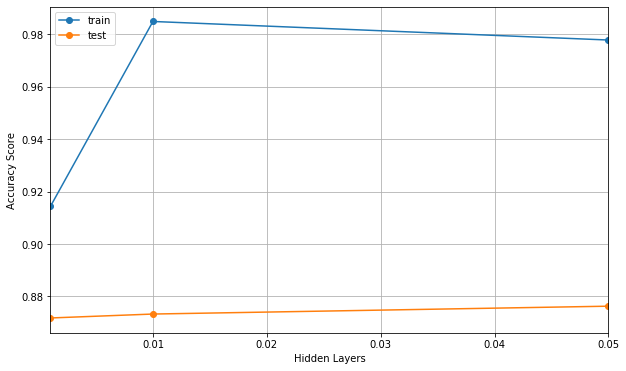

In [119]:
# Plot results from varying shape
learn_df = pd.DataFrame(learn_dict)
fig, ax = plt.subplots(figsize=(10,6))
learn_df.transpose().loc[:, ['train', 'test']].plot(marker='o', ax=ax)
plt.grid(True)
plt.ylabel('Accuracy Score')
plt.xlabel('Hidden Layers')
plt.savefig('MLP_learn.png')
plt.show()

learn_df.transpose().loc[:, ['train', 'test']].plot(marker='o', ax=ax)
plt.grid(True)
plt.ylabel('Accuracy Score')
plt.xlabel('Hidden Layers')
plt.savefig('MLP_learn.png')
plt.show()

In [122]:
start = time.time()
# Create the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(175,75), max_iter=250, activation='logistic',
                    solver='sgd', verbose=True, random_state=True,
                    learning_rate_init=0.05, learning_rate='adaptive')

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Get the training and testing scores
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

train_time = time.time()-start

# Print for output while running
print("Training time: {:0.1} seconds".format(train_time))
print("Training set score: {:0.4f}".format(train_score) )
print("Test set score: {:0.4f}".format(test_score))

Iteration 1, loss = 0.90040131
Iteration 2, loss = 0.44949597
Iteration 3, loss = 0.39411803
Iteration 4, loss = 0.36257993
Iteration 5, loss = 0.33980645
Iteration 6, loss = 0.32124461
Iteration 7, loss = 0.30501905
Iteration 8, loss = 0.28975303
Iteration 9, loss = 0.27670194
Iteration 10, loss = 0.26407979
Iteration 11, loss = 0.25156214
Iteration 12, loss = 0.24102853
Iteration 13, loss = 0.22975036
Iteration 14, loss = 0.21996870
Iteration 15, loss = 0.20943870
Iteration 16, loss = 0.19999832
Iteration 17, loss = 0.19050031
Iteration 18, loss = 0.18089597
Iteration 19, loss = 0.17148841
Iteration 20, loss = 0.16283039
Iteration 21, loss = 0.15507338
Iteration 22, loss = 0.14663684
Iteration 23, loss = 0.13863470
Iteration 24, loss = 0.13195868
Iteration 25, loss = 0.12318663
Iteration 26, loss = 0.11506707
Iteration 27, loss = 0.10978081
Iteration 28, loss = 0.10325835
Iteration 29, loss = 0.09667615
Iteration 30, loss = 0.08987124
Iteration 31, loss = 0.08384557
Iteration 32, los

In [123]:
train_time

550.7952456474304

### XGBoost

In [2]:
import xgboost as xgb # Import XGBoost, gpu accelerated Gradient Boosting package
from sklearn import metrics # Import metrics from sklearn to get accuracy score on XGBoost model

# Create test and training data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# specify parameters via map
param = {
    'predictor': 'gpu_predictor',
    'tree_method': 'gpu_hist',
    'verbosity': 2,                    # logging mode - quiet
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10                 # the number of classes that exist in this datset
}  
num_round = 50  # the number of training iterations

# Start timer and train model
start = time.time()
bst = xgb.train(param, dtrain, num_round)

# make prediction
preds = bst.predict(dtest)
# caclulate accuracy score
acc = metrics.accuracy_score(y_test.astype(float), preds)

# Check model accuracy and time to train
print(f"Accuracy: {acc*100:0.2f}%")
print(f"Elapse time: {time.time()-start:0.2f}s")

Accuracy: 88.76%
Elapse time: 77.54s


In [6]:
# specify parameters via map
param = {
    'predictor': 'gpu_predictor',
    'tree_method': 'gpu_hist',
    'learning_rate': 0.1,
    'gamma': 0.1,
    'max_depth': 7,
    'colsample_bytree': 0.7,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'min_child_weight': 7,
    'n_estimators': 200,
    'verbosity': 2,                    # logging mode - quiet
    'objective': 'multi:softmax',   # multiclass classification using the softmax objective
    'num_class': 10                 # the number of classes that exist in this datset
}  
num_round = 100  # the number of training iterations

# Start timer and train model
start = time.time()
bst = xgb.train(param, dtrain, num_round)

# make prediction
preds = bst.predict(dtest)
# caclulate accuracy score
acc = metrics.accuracy_score(y_test.astype(float), preds)

# Check model accuracy and time to train
print(f"Accuracy: {acc*100:0.2f}%")
print(f"Elapse time: {time.time()-start:0.2f}s")

Accuracy: 89.09%
Elapse time: 155.79s


### Testing code

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0, verbose=True)
clf.fit(X_train, y_train)
clf.score(X_test, y_test) 

      Iter       Train Loss   Remaining Time 
         1      114691.9273            4.83m
         2       97227.5060            4.84m
         3       86448.3271            4.86m
         4     4233050.2114            4.78m
         5     4227269.6935            4.70m
         6     4222497.2443            4.65m
         7     4218280.7969            4.59m
         8     4215024.3449            4.53m
         9     4213074.2764            4.48m
        10     4211019.3595            4.45m
        20     8990041.7118            4.12m
        30     8986940.8632            3.56m
        40     8984912.6445            3.03m
        50     8983434.7708            2.53m
        60     8982359.8184            2.02m
        70     8981546.3308            1.53m
        80     8980845.8722            1.02m
        90     8980215.8020           30.67s
       100     8980928.4708            0.00s


0.7923

In [1]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb



# Create XGB Classifier object
xgb_clf = xgb.XGBClassifier(tree_method = "gpu_exact", predictor = "gpu_predictor", verbosity = 3,
                           eval_metric = ["merror", "map", "auc"], objective = "multi:softmax")
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

start = time.time()
# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1_micro",
                             cv = 7, verbose = 3, random_state = 40)

# Fit the model
model_xgboost = xgb_rscv.fit(X_train, y_train)

NameError: name 'time' is not defined

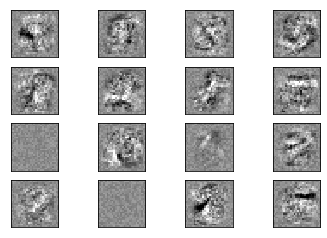

In [6]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()